In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize

In [2]:
class FashionMNISTtask1(datasets.FashionMNIST):
  def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
    super(FashionMNISTtask1, self).__init__(root, train=train, transform=transform,
                                            target_transform=target_transform,download=download)
    self.classes = self.classes[:6]

  def __getitem__(self, index):
    img, target = super(FashionMNISTtask1, self).__getitem__(index)
    if target < 6:
        return img, target
    else:
        return img, -1

In [3]:
class FashionMNISTtask2(datasets.FashionMNIST):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super(FashionMNISTtask2, self).__init__(root, train=train, transform=transform,
                                                target_transform=target_transform,download=download)
        self.classes = self.classes[6:]

    def __getitem__(self, index):
        img, target = super(FashionMNISTtask2, self).__getitem__(index)
        if target >= 6:
            return img, target
        else:
            return img, -1

In [4]:
transform = torchvision.transforms.Compose([ToTensor(), Normalize((0.5), (0.5))])

train_dataset_1 = FashionMNISTtask1(root='./data1', train=True, transform=transform, download=True)
test_dataset_1 = FashionMNISTtask1(root='./data1', train=False, transform=transform, download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 15313578.53it/s]


Extracting ./data1/FashionMNISTtask1/raw/train-images-idx3-ubyte.gz to ./data1/FashionMNISTtask1/raw



100%|██████████| 29515/29515 [00:00<00:00, 307571.04it/s]


Extracting ./data1/FashionMNISTtask1/raw/train-labels-idx1-ubyte.gz to ./data1/FashionMNISTtask1/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5696568.63it/s]


Extracting ./data1/FashionMNISTtask1/raw/t10k-images-idx3-ubyte.gz to ./data1/FashionMNISTtask1/raw



100%|██████████| 5148/5148 [00:00<00:00, 13361557.54it/s]


Extracting ./data1/FashionMNISTtask1/raw/t10k-labels-idx1-ubyte.gz to ./data1/FashionMNISTtask1/raw



Image shape: torch.Size([1, 28, 28]) Label: -1


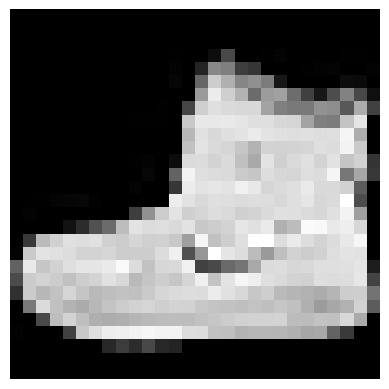

Image shape: torch.Size([1, 28, 28]) Label: 0


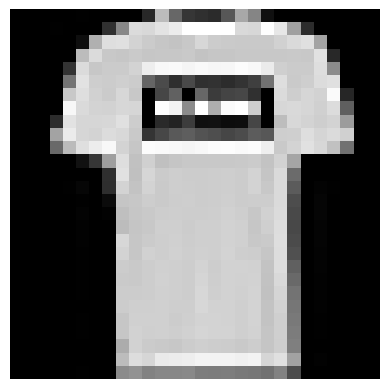

Image shape: torch.Size([1, 28, 28]) Label: 0


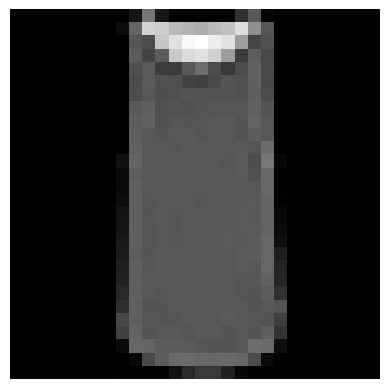

Image shape: torch.Size([1, 28, 28]) Label: 3


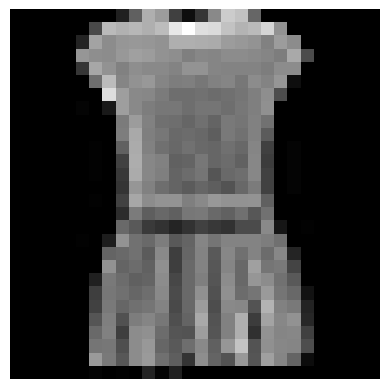

Image shape: torch.Size([1, 28, 28]) Label: 0


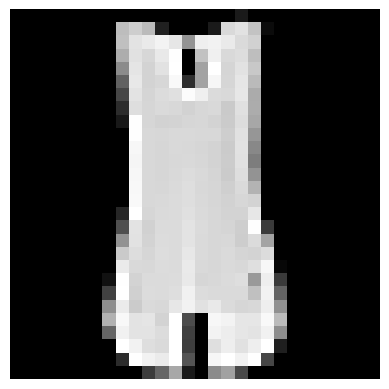

Image shape: torch.Size([1, 28, 28]) Label: 2


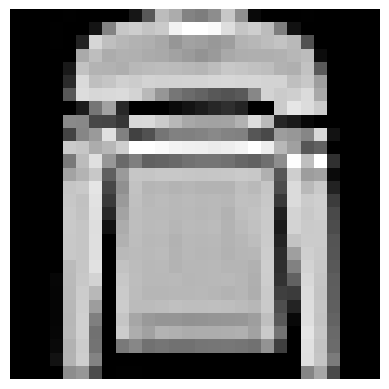

Image shape: torch.Size([1, 28, 28]) Label: -1


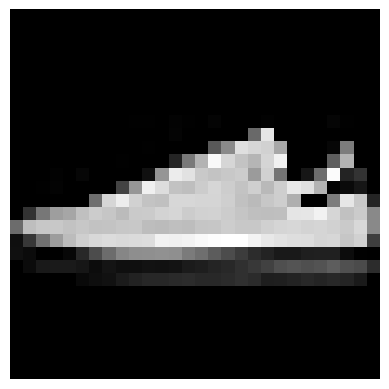

Image shape: torch.Size([1, 28, 28]) Label: 2


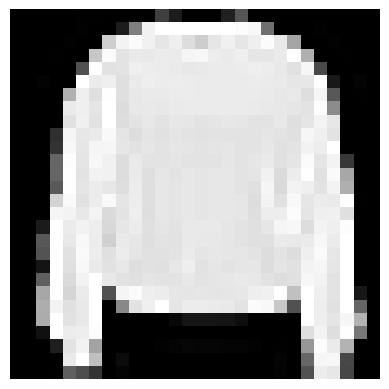

Image shape: torch.Size([1, 28, 28]) Label: 5


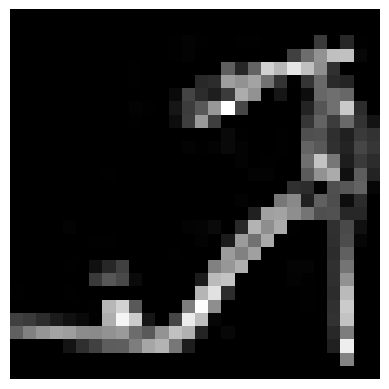

Image shape: torch.Size([1, 28, 28]) Label: 5


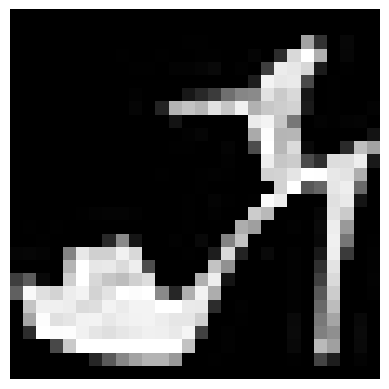

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display an image
def show_image(image):
    # Convert the PyTorch tensor to a numpy array and reshape it to (28, 28)
    image = np.squeeze(image.numpy())
    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Example: Display the first 10 images from the training dataset
for i in range(10):
    image, target = train_dataset_1[i]
    print("Image shape:", image.shape, "Label:", target)
    show_image(image)

In [6]:
train_dataset_2 = FashionMNISTtask2(root='./data2', train=True, transform=transform, download=True)
test_dataset_2 = FashionMNISTtask2(root='./data2', train=False, transform=transform, download=True)
test_dataset_3 = datasets.FashionMNIST(
    root='data3',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16620037.61it/s]


Extracting ./data2/FashionMNISTtask2/raw/train-images-idx3-ubyte.gz to ./data2/FashionMNISTtask2/raw



100%|██████████| 29515/29515 [00:00<00:00, 294999.06it/s]


Extracting ./data2/FashionMNISTtask2/raw/train-labels-idx1-ubyte.gz to ./data2/FashionMNISTtask2/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5396951.98it/s]


Extracting ./data2/FashionMNISTtask2/raw/t10k-images-idx3-ubyte.gz to ./data2/FashionMNISTtask2/raw



100%|██████████| 5148/5148 [00:00<00:00, 18314060.21it/s]


Extracting ./data2/FashionMNISTtask2/raw/t10k-labels-idx1-ubyte.gz to ./data2/FashionMNISTtask2/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 16738233.01it/s]


Extracting data3/FashionMNIST/raw/train-images-idx3-ubyte.gz to data3/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 302478.77it/s]


Extracting data3/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data3/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5568681.27it/s]


Extracting data3/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data3/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5642089.62it/s]

Extracting data3/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data3/FashionMNIST/raw



In [7]:
train_dataset_filtered_first = [data for data in train_dataset_1 if data[1] != -1]
test_dataset_filtered_first = [data for data in test_dataset_1 if data[1] != -1]

train_dataset_filtered_second = [data for data in train_dataset_2 if data[1] != -1]
test_dataset_filtered_second = [data for data in test_dataset_2 if data[1] != -1]

In [8]:
unique_labels_1 = set()
unique_labels_2 = set()

for _, target in train_dataset_filtered_first:
    unique_labels_1.add(target)

for _, target in train_dataset_filtered_second:
    unique_labels_2.add(target)

print(f"First: {unique_labels_1}")
print(f"Second: {unique_labels_2}")

First: {0, 1, 2, 3, 4, 5}
Second: {8, 9, 6, 7}


In [9]:
train_dataloader_first = DataLoader(train_dataset_filtered_first, batch_size=64, shuffle=True)
test_dataloader_first = DataLoader(test_dataset_filtered_first, batch_size=256, shuffle=False)

for X, y in train_dataloader_first:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"SHape of y: {y.shape}, dtype: {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
SHape of y: torch.Size([64]), dtype: torch.int64


In [10]:
train_dataloader_second = DataLoader(train_dataset_filtered_second, batch_size=64, shuffle=True)
test_dataloader_second = DataLoader(test_dataset_filtered_second, batch_size=256, shuffle=False)

In [11]:
eval_dataloader = DataLoader(test_dataset_3, batch_size=256, shuffle=True)

In [12]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cpu device


In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_classes=10, hidden_size=512):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(28*28, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.classifier = nn.Linear(hidden_size, num_classes)

    #     self._initialize_weights()

    # def _initialize_weights(self):
    #     for m in self.modules():
    #         if isinstance(m, nn.Linear):
    #             nn.init.kaiming_normal_(m.weight, nonlinearity='sigmoid')
    #         elif isinstance(m, nn.Conv2d):
    #             nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        logits = self.classifier(x)

        return logits

In [14]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch+1) * len(X)
      print(f"Loss: {loss:>7f}, {current:>5d}/{size:>5d}")

In [15]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()

  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}, Avg Loss: {test_loss:>8f}\n")

In [16]:
model = NeuralNetwork(num_classes=10, hidden_size=512).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [17]:
epochs = 3
for t in range(epochs):
  print(f"Epoch {t+1}\n---------------------------")
  train(train_dataloader_first, model, loss_fn, optimizer)
  test(test_dataloader_first, model, loss_fn)
print("Done!")

torch.save(model.state_dict(), "model_old.pth")

Epoch 1
---------------------------
Loss: 2.340697,    64/36000
Loss: 0.412367,  6464/36000
Loss: 0.224573, 12864/36000
Loss: 0.320390, 19264/36000
Loss: 0.245802, 25664/36000
Loss: 0.199593, 32064/36000
Test Error: 
 Accuracy: 88.6, Avg Loss: 0.304133

Epoch 2
---------------------------
Loss: 0.262140,    64/36000
Loss: 0.324554,  6464/36000
Loss: 0.151620, 12864/36000
Loss: 0.280431, 19264/36000
Loss: 0.370626, 25664/36000
Loss: 0.289975, 32064/36000
Test Error: 
 Accuracy: 89.6, Avg Loss: 0.279703

Epoch 3
---------------------------
Loss: 0.195121,    64/36000
Loss: 0.310386,  6464/36000
Loss: 0.302730, 12864/36000
Loss: 0.431754, 19264/36000
Loss: 0.176250, 25664/36000
Loss: 0.249265, 32064/36000
Test Error: 
 Accuracy: 90.1, Avg Loss: 0.258040

Done!


In [18]:
def val(epoch):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(eval_dataloader):
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted_old = outputs.max(1)
            print(predicted_old)
            total += len(y)
            correct += predicted_old.eq(y).sum().item()
        print(f"Validation Acc: {100. * correct / total}\n")

In [19]:
val(1)

tensor([1, 5, 3, 0, 1, 2, 0, 5, 1, 3, 2, 0, 0, 4, 1, 5, 0, 5, 0, 3, 2, 0, 1, 5,
        5, 0, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 3, 4, 3, 2, 3, 5, 1, 4, 4,
        0, 2, 2, 0, 5, 0, 0, 3, 5, 5, 3, 3, 5, 4, 4, 0, 1, 3, 5, 5, 0, 3, 3, 5,
        3, 4, 1, 4, 2, 0, 3, 3, 0, 5, 2, 5, 5, 4, 5, 5, 0, 5, 3, 5, 4, 2, 5, 2,
        0, 2, 5, 0, 4, 2, 0, 2, 3, 5, 5, 5, 4, 5, 0, 5, 3, 0, 1, 0, 4, 5, 5, 3,
        5, 4, 5, 0, 0, 0, 5, 5, 4, 1, 1, 5, 5, 2, 4, 0, 2, 2, 5, 0, 4, 1, 2, 5,
        5, 3, 5, 5, 0, 0, 2, 4, 5, 4, 5, 4, 5, 1, 5, 1, 5, 1, 5, 0, 5, 5, 2, 5,
        3, 5, 5, 2, 4, 5, 1, 1, 1, 0, 2, 0, 4, 2, 5, 1, 0, 4, 5, 1, 0, 4, 4, 5,
        3, 1, 2, 5, 1, 2, 5, 0, 3, 5, 4, 5, 5, 4, 4, 3, 5, 3, 5, 5, 0, 4, 5, 5,
        2, 3, 2, 5, 5, 5, 5, 1, 5, 3, 5, 2, 2, 2, 5, 5, 2, 4, 3, 5, 1, 5, 4, 1,
        2, 3, 0, 4, 5, 5, 2, 5, 1, 2, 4, 5, 0, 0, 4, 5])
tensor([4, 0, 0, 4, 1, 4, 3, 2, 4, 0, 3, 3, 3, 5, 4, 5, 2, 2, 1, 5, 5, 3, 0, 2,
        3, 0, 1, 5, 5, 3, 5, 4, 2, 4, 3, 2, 4, 4, 4, 5, 5, 5, 3

________

In [20]:
# model = NeuralNetwork()
# model.load_state_dict(torch.load("model_old.pth"))

In [21]:
from copy import deepcopy

def get_fisher_diag(model, dataset, params, empirical=False):
    fisher = {}
    params_dict = dict(params)
    for n, p in deepcopy(params_dict).items():
        p.data.zero_()
        fisher[n] = p.data.clone().detach().requires_grad_()

    model.eval()

    for input, gt_label in dataset:
        input, gt_label = input.to(device), gt_label.to(device)
        model.zero_grad()
        output = model(input)

        if empirical:
            label = output.max(1)[1]
        else:
            label = gt_label

        # label = gt_label.repeat(output.size(0))
        negloglikelihood = torch.nn.functional.nll_loss(torch.nn.functional.log_softmax(output, dim=1), label)
        negloglikelihood.backward()

        for n, p in model.named_parameters():
            fisher[n].data += p.grad.data ** 2 / len(dataset.dataset)

    fisher = {n: p for n, p in fisher.items()}
    return fisher


def get_ewc_loss(model, fisher, p_old):
    loss = 0
    for n, p in model.named_parameters():
        if n in fisher:
            _loss = fisher[n] * (p - p_old[n]) ** 2
            loss += _loss.sum()
    return loss

In [22]:
model.to(device)

ewc_lambda = 0.1

fisher_matrix = get_fisher_diag(model, train_dataloader_first, model.named_parameters())
prev_params = {n: p.data.clone() for n, p in model.named_parameters()}

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [23]:
print(fisher_matrix)

{'fc1.weight': tensor([[8.6726e-10, 8.5288e-10, 8.2339e-10,  ..., 7.7740e-10, 8.3501e-10,
         8.6546e-10],
        [1.1096e-09, 1.1099e-09, 1.1101e-09,  ..., 1.0744e-09, 1.0980e-09,
         1.1061e-09],
        [6.1740e-09, 6.1605e-09, 6.1256e-09,  ..., 5.7594e-09, 6.0204e-09,
         6.1443e-09],
        ...,
        [2.5380e-07, 2.5380e-07, 2.5373e-07,  ..., 2.5300e-07, 2.5355e-07,
         2.5373e-07],
        [3.2813e-08, 3.2812e-08, 3.2837e-08,  ..., 3.2372e-08, 3.2818e-08,
         3.2820e-08],
        [8.9682e-09, 8.9668e-09, 8.9626e-09,  ..., 8.7344e-09, 8.9291e-09,
         8.9647e-09]], requires_grad=True), 'fc1.bias': tensor([8.6726e-10, 1.1096e-09, 6.1740e-09, 1.9273e-07, 2.0178e-08, 8.4817e-08,
        4.6701e-08, 2.6493e-11, 1.8771e-07, 1.1770e-10, 5.9553e-09, 8.0441e-11,
        7.5498e-09, 4.9244e-09, 4.5713e-08, 8.4694e-08, 1.1477e-07, 1.9586e-08,
        8.5527e-08, 3.1953e-09, 4.6153e-10, 1.2233e-07, 2.9293e-08, 4.9078e-10,
        3.0491e-08, 1.5702e-08, 7.45

In [24]:
def train(dataloader, model, loss_fn, optimizer, fisher_matrix, prev_params):
    model.train()
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)

        # Original loss
        ce_loss = loss_fn(pred, y)

        # EWC loss
        ewc_loss = get_ewc_loss(model, fisher_matrix, prev_params)

        loss = ce_loss + ewc_lambda * ewc_loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch+1)*len(X)
            print(f"Loss: {loss:>7f}, {current:>5d}/{size:>5d}")

In [25]:
def val(epoch):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(eval_dataloader):
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            print(y)
            _, predicted_old = outputs.max(1)
            total += len(y)
            correct += predicted_old.eq(y).sum().item()
        print(f"Validation Acc: {100. * correct / total}\n")

In [26]:
for epoch in range(3):
    print(f"Epoch {epoch+1}: ----------------------")
    train(train_dataloader_second, model, loss_fn, optimizer, fisher_matrix, prev_params)
    test(test_dataloader_second, model, loss_fn)
print("Done!")

Epoch 1: ----------------------
Loss: 11.035961,    64/24000
Loss: 0.155565,  6464/24000
Loss: 0.144109, 12864/24000
Loss: 0.175206, 19264/24000
Test Error: 
 Accuracy: 94.8, Avg Loss: 0.138421

Epoch 2: ----------------------
Loss: 0.151538,    64/24000
Loss: 0.113957,  6464/24000
Loss: 0.039975, 12864/24000
Loss: 0.060414, 19264/24000
Test Error: 
 Accuracy: 96.2, Avg Loss: 0.106778

Epoch 3: ----------------------
Loss: 0.046850,    64/24000
Loss: 0.160084,  6464/24000
Loss: 0.093932, 12864/24000
Loss: 0.093473, 19264/24000
Test Error: 
 Accuracy: 96.5, Avg Loss: 0.100669

Done!


In [27]:
val(1)

tensor([4, 6, 2, 4, 0, 5, 1, 7, 1, 8, 8, 8, 2, 7, 3, 6, 3, 2, 2, 2, 8, 1, 7, 7,
        0, 7, 9, 7, 3, 8, 9, 6, 7, 7, 7, 1, 8, 4, 7, 9, 1, 4, 0, 2, 2, 8, 2, 6,
        7, 1, 9, 3, 5, 1, 6, 7, 5, 0, 5, 1, 9, 8, 0, 7, 1, 4, 4, 0, 9, 5, 4, 8,
        4, 8, 8, 0, 2, 8, 2, 8, 0, 4, 8, 3, 5, 6, 7, 0, 9, 8, 4, 4, 0, 0, 6, 2,
        9, 3, 0, 4, 5, 0, 0, 3, 5, 4, 1, 3, 7, 0, 7, 3, 2, 4, 5, 4, 7, 7, 2, 3,
        6, 8, 8, 5, 9, 8, 4, 2, 8, 1, 6, 0, 9, 0, 1, 0, 3, 8, 5, 8, 0, 2, 8, 3,
        6, 7, 1, 3, 7, 0, 7, 0, 1, 9, 9, 5, 9, 9, 9, 8, 7, 9, 7, 4, 0, 2, 1, 3,
        9, 2, 6, 7, 0, 8, 7, 6, 2, 0, 5, 4, 4, 0, 2, 4, 0, 0, 7, 4, 5, 5, 8, 2,
        7, 5, 4, 4, 2, 7, 9, 0, 7, 8, 8, 3, 2, 6, 6, 5, 2, 7, 2, 1, 2, 5, 0, 7,
        3, 6, 4, 7, 2, 6, 0, 2, 9, 0, 1, 9, 9, 3, 7, 5, 1, 0, 8, 9, 1, 7, 6, 1,
        4, 9, 5, 0, 3, 9, 1, 4, 9, 9, 2, 3, 0, 0, 1, 6])
tensor([6, 1, 7, 2, 6, 4, 4, 8, 0, 5, 8, 1, 4, 2, 8, 0, 3, 6, 3, 8, 1, 9, 4, 1,
        2, 5, 5, 1, 9, 2, 0, 4, 7, 2, 3, 7, 8, 5, 9, 2, 0, 5, 7

In [28]:
fisher_matrix = get_fisher_diag(model, train_dataloader_first, model.named_parameters())

In [29]:
print(fisher_matrix)

{'fc1.weight': tensor([[9.4563e-07, 9.4555e-07, 9.4521e-07,  ..., 9.4329e-07, 9.4459e-07,
         9.4570e-07],
        [2.1254e-09, 2.1247e-09, 2.1223e-09,  ..., 1.6164e-09, 2.0430e-09,
         2.1228e-09],
        [7.6973e-12, 7.6973e-12, 7.6973e-12,  ..., 7.6973e-12, 7.6973e-12,
         7.6973e-12],
        ...,
        [2.0616e-06, 2.0613e-06, 2.0593e-06,  ..., 2.0611e-06, 2.0617e-06,
         2.0616e-06],
        [3.8372e-09, 3.8358e-09, 3.8213e-09,  ..., 3.8112e-09, 3.8202e-09,
         3.8291e-09],
        [3.3255e-04, 3.3253e-04, 3.3239e-04,  ..., 3.1958e-04, 3.3022e-04,
         3.3241e-04]], requires_grad=True), 'fc1.bias': tensor([9.4563e-07, 2.1254e-09, 7.6973e-12, 4.0972e-10, 1.2620e-04, 5.0807e-08,
        9.3889e-12, 1.3611e-09, 2.5702e-05, 2.1365e-10, 3.7063e-05, 1.0238e-09,
        2.4659e-10, 2.0083e-11, 4.2808e-09, 3.7231e-04, 1.4292e-12, 9.4626e-06,
        1.4138e-10, 1.6487e-07, 1.1350e-05, 1.1756e-08, 4.5347e-06, 1.5079e-10,
        1.7193e-06, 3.2122e-12, 4.92